# Assignment 3 - Text Analysis
An explanation this assignment could be found in the .pdf explanation document


## Materials to review for this assignment
<h4>From Moodle:</h4> 
<h5><u>Review the notebooks regarding the following python topics</u>:</h5>
<div class="alert alert-info">
&#x2714; <b>Working with strings</b> (tutorial notebook)<br/>
&#x2714; <b>Text Analysis</b> (tutorial notebook)<br/>
&#x2714; <b>Hebrew text analysis tools (tokenizer, wordnet)</b> (moodle example)<br/>
&#x2714; <b>(brief review) All previous notebooks</b><br/>
</div> 
<h5><u>Review the presentations regarding the following topics</u>:</h5>
<div class="alert alert-info">
&#x2714; <b>Text Analysis</b> (lecture presentation)<br/>
&#x2714; <b>(brief review) All other presentations</b><br/>
</div>

## Personal Details:

In [1]:
# Details Student 1:
print("Shir Zimer")
# Details Student 2:


## Preceding Step - import modules (packages)
This step is necessary in order to use external modules (packages). <br/>

In [2]:
# --------------------------------------
import pandas as pd
import numpy as np
# --------------------------------------


# --------------------------------------
# ------------- visualizations:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
# --------------------------------------


# ---------------------------------------
import sklearn
from sklearn import preprocessing, metrics, pipeline, model_selection, feature_extraction 
from sklearn import naive_bayes, linear_model, svm, neural_network, neighbors, tree
from sklearn import decomposition, cluster

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV 
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error, r2_score, silhouette_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder

from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import Perceptron, SGDClassifier
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
# ---------------------------------------


# ----------------- output and visualizations: 
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter("ignore", category=ConvergenceWarning)
# show several prints in one cell. This will allow us to condence every trick in one cell.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# ---------------------------------------

### Text analysis and String manipulation imports:

In [3]:
# --------------------------------------
# --------- Text analysis and Hebrew text analysis imports:
# vectorizers:
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# regular expressions:
import re
# --------------------------------------

### (optional) Hebrew text analysis - WordNet (for Hebrew)
Note: the WordNet is not a must

#### (optional) Only if you didn't install Wordnet (for Hebrew) use:

In [4]:
# word net installation:

# unmark if you want to use and need to install
# !pip install wn
# !python -m wn download omw-he:1.4

In [5]:
# word net import:

# unmark if you want to use:
# import wn

### (optional) Hebrew text analysis - hebrew_tokenizer (Tokenizer for Hebrew)
Note: the hebrew_tokenizer is not a must

#### (optional) Only if you didn't install hebrew_tokenizer use:

In [6]:
# Hebrew tokenizer installation:

# unmark if you want to use and need to install:
# !pip install hebrew_tokenizer

In [7]:
# Hebrew tokenizer import:

# unmark if you want to use:
# import hebrew_tokenizer as ht

### Reading input files
Reading input files for train annotated corpus (raw text data) corpus and for the test corpus

In [8]:
train_filename = 'annotated_corpus_for_train.csv'
test_filename  = 'corpus_for_test.csv'
df_train = pd.read_csv(train_filename, index_col=None, encoding='utf-8')
df_test  = pd.read_csv(test_filename, index_col=None, encoding='utf-8')

In [9]:
df_train.head(8)
df_train.shape

,story,gender
0,"כשחבר הזמין אותי לחול, לא באמת חשבתי שזה יקרה,...",m
1,לפני שהתגייסתי לצבא עשיתי כל מני מיונים ליחידו...,m
2,מאז שהתחילו הלימודים חלומו של כל סטודנט זה הפנ...,f
3,"כשהייתי ילד, מטוסים היה הדבר שהכי ריתק אותי. ב...",m
4,‏הייתי מדריכה בכפר נוער ומתאם הכפר היינו צריכי...,f
5,לפני כ3 חודשים טסתי לרומא למשך שבוע. טסתי במטו...,f
6,אני כבר שנתיים נשוי והשנה אני ואישתי סוף סוף י...,m
7,השנה התחלנו שיפוץ בדירה שלנו בתל אביב. הדירה ה...,f


(753, 2)

In [10]:
df_test.head(3)
df_test.shape

,test_example_id,story
0,0,כל קיץ אני והמשפחה נוסעים לארצות הברית לוס אנג...
1,1,"הגעתי לשירות המדינה אחרי שנתיים כפעיל בתנועת ""..."
2,2,אחת האהבות הגדולות שלי אלו הכלבים שלי ושל אישת...


(323, 2)

### Your implementation:
Write your code solution in the following code-cells

<Figure size 576x360 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, 'Male vs Female Counts in df_train')

Text(0, 0.5, 'Number of Occurrences')

Text(0.5, 0, 'Gender')

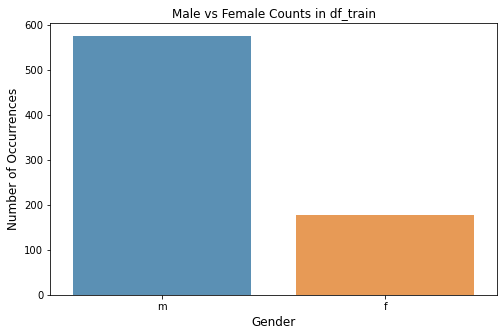

In [11]:
gender_counts = df_train['gender'].value_counts()
# Plot
plt.figure(figsize=(8,5))
sns.barplot(gender_counts.index, gender_counts.values, alpha=0.8)

plt.title('Male vs Female Counts in df_train')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Gender', fontsize=12)
plt.show()

In [12]:
df_train_X = list(df_train.loc[:,'story'])
docs = []
for sen in range(0, len(df_train_X)):
    # Remove all special characters except Hebrew ones
    doc = re.sub(r'[^א-ת\s]', ' ', str(df_train_X[sen]))

    # Removing single Hebrew characters
    doc = re.sub(r'\s+[א-ת]\s+', ' ', doc)

    # Removing single Hebrew characters from the start:
    doc = re.sub(r'^[א-ת]\s+', ' ', doc)

    # Substituting multiple spaces with single space
    doc = re.sub(r'\s+', ' ', doc, flags=re.I)
    
    docs.append(doc)

encoder = preprocessing.LabelEncoder()
train_y = encoder.fit_transform(df_train.loc[:,'gender'])

# Create a word level tf-idf

In [13]:
tfidf_vect = TfidfVectorizer(max_features=1500, min_df=5, max_df=0.7)
tfidf_vect.fit(docs)

# Transform the training and validation data using  tf-idf vectorizer object
train_X = tfidf_vect.transform(docs)
test_X = tfidf_vect.transform(df_test.loc[:,'story'])

TfidfVectorizer(max_df=0.7, max_features=1500, min_df=5)

# Build a decision tree model for classification

In [14]:
# Decision tree model on tf-idf vectors
tree_classifier = tree.DecisionTreeClassifier(random_state=0, max_depth=10,min_samples_split = 5, min_samples_leaf = 3)
tree_classifier.fit(train_X, train_y)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=3, min_samples_split=5,
                       random_state=0)

# Cross validation

In [15]:
train_X, valid_X, train_y, valid_y = model_selection.train_test_split(train_X, train_y, test_size=0.2, random_state=0)
valid_scores = cross_val_score(tree_classifier, train_X, train_y, n_jobs=1)
print(valid_scores)

# calculate test accuracy
valid_pred = tree_classifier.predict(valid_X)
print('Test Accuracy:', metrics.accuracy_score(valid_pred, valid_y))

[0.70247934 0.62809917 0.675      0.71666667 0.65      ]
Test Accuracy: 0.9072847682119205


# F1-score

In [16]:
# calculate f1-score
f1 = f1_score(valid_pred, valid_y)
print('F1-score:', f1)

# basically macro average of f1
f1_female, f1_male = f1_score(valid_pred, valid_y,average = None)
f1_avg = (f1_female + f1_male)/2
print('Average f1-score:', f1_avg)

F1-score: 0.9421487603305785
Average f1-score: 0.8544077134986225


# Predict the test data, and save the results in dataframe.

In [17]:
test_pred = tree_classifier.predict(test_X)
labels = ['f','m']
pred = []
for i in range(len(test_pred)):
  pred.append(labels[test_pred[i]])

test_example_id = list(df_test.loc[:,'test_example_id'])
data = {'test_example_id':test_example_id, 'predicted_category':pred}
df_predicted = pd.DataFrame(data,
                   columns=['test_example_id', 'predicted_category'])
df_predicted.head()

,test_example_id,predicted_category
0,0,m
1,1,m
2,2,m
3,3,m
4,4,f


### Save output to csv (optional)
After you're done save your output to the 'classification_results.csv' csv file.<br/>
We assume that the dataframe with your results contain the following columns:
* column 1 (left column): 'test_example_id'  - the same id associated to each of the test stories to be predicted.
* column 2 (right column): 'predicted_category' - the predicted gender value for each of the associated story. 

Assuming your predicted values are in the `df_predicted` dataframe, you should save you're results as following:

In [18]:
df_predicted.to_csv('classification_results.csv',index=False)